# Load Libraries

In [ ]:
#brew install graphviz
%pip3 install graphviz

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load Dataset 

In [24]:
data = pd.read_csv('./heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Divide data into Dependent and Independent Variables

In [29]:
#Get Target data 
y = data['target']

#Load X Variables into a Pandas Dataframe with columns 
X = data.drop(['target'], axis = 1)

# Divide Data into Train and test

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [31]:
# #Export Train DataFarme
# export_Train = pd.concat([X_train, y_train], axis = 1)
# export_Train.to_csv('train_df.csv', index = False)

# Build Decision Tree Model with Hyperparameter Tuning

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
#Using max_depth, criterion will suffice for DT Models, rest all will remain constant 
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

In [42]:
DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

In [43]:
DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

## Check Accuracy (Not Overfitting anymore)

In [44]:
DT_grid.best_estimator_

DecisionTreeClassifier(max_depth=15, max_features='log2', min_samples_split=4)

In [45]:
#Re Build Model with Best Estimators
DT_Model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

DT_Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_split=4)

In [46]:
print (f'Train Accuracy - : {DT_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.835
Test Accuracy - : 0.852


# Plot Tree
export_graphviz documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

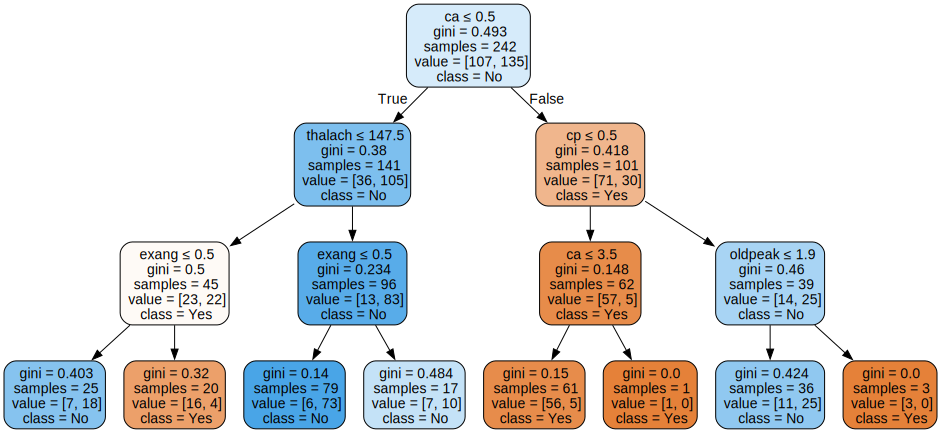

In [48]:
dot_data = export_graphviz(DT_Model,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=['Yes','No'],      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Export Decision Tree PDF

In [49]:
dot_data = export_graphviz(DT_Model, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['Yes','No'],
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("generated_file_Heart_Diesease") 

'generated_file_Heart_Diesease.pdf'

# END